#### Importar las librerías 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### Importar el dataset

In [2]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape
print(dataHP.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Extraemos las columnas con NAN

In [3]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##Tenemos 81 columnas en total, ahora vamos a revisar cuales tienen NAN 
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean())> 0]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Vamos a revisar que tipo de dato son las columnas 

In [5]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

#### Ahora vemos la media de NAN que hay en cada columna

In [6]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean() 

prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

#### Seleccionamos las variables rescatables y revisamos el tipo (criterio 6%)  

In [7]:
cols_rescatables = prop_nan_per_col[prop_nan_per_col <= 0.06]
cols_rescatables


MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [8]:
dataHP[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].dtypes


MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [9]:
dataHP[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].head()


,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


#### Tenemos 2 variables númericas con las cuales vamos a imputar según sea favorable (media, mediana o moda). 

In [10]:
#Empezamos con 'MasVnrArea'
media = dataHP['MasVnrArea'].mean()
mediana =dataHP['MasVnrArea'].median()
print(f"Media:{media}")
print(f"Mediana:{mediana}")
##Seleccionamos la media para sustituir los NAN

Media:103.68526170798899
Mediana:0.0


In [11]:
 #Redondeamos la media e imputamos los datos
dataHP['MasVnrArea_mean']=np.round(dataHP['MasVnrArea'].fillna(media),2)



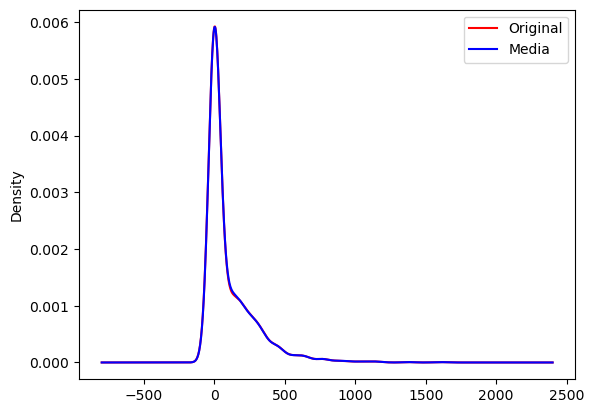

In [12]:
##Comparamos graficamente
fig=plt.figure()
ax =fig.add_subplot(111)
dataHP['MasVnrArea'].plot.density(color='red',label='Original')
dataHP['MasVnrArea_mean'].plot.density(color='blue',label='Media')
ax.legend()
plt.show()
##Queda igual el comportamiento de la densidad. 

<AxesSubplot:>

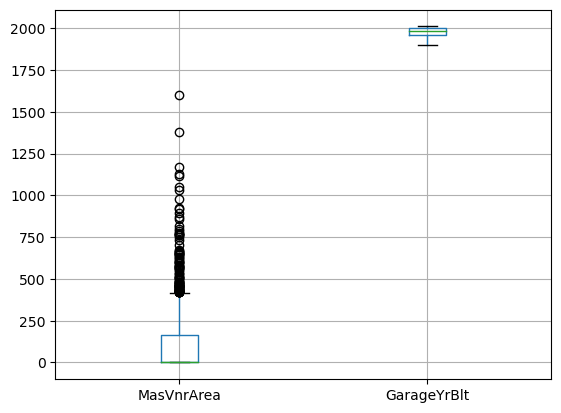

In [13]:
dataHP[['MasVnrArea','GarageYrBlt']].boxplot()

In [14]:
#Continuamos con 'GarageYrBlt'
media = dataHP['GarageYrBlt'].mean()
mediana =dataHP['GarageYrBlt'].median()
print(f"Media:{media}")
print(f"Mediana:{mediana}")
##Seleccionamos la media para sustituir los NAN

Media:1978.5061638868744
Mediana:1980.0


In [15]:
dataHP['GarageYrBlt_mean']=np.round(dataHP['MasVnrArea'].fillna(media),2)
dataHP['GarageYrBlt_median']=np.round(dataHP['MasVnrArea'].fillna(mediana),2)

 

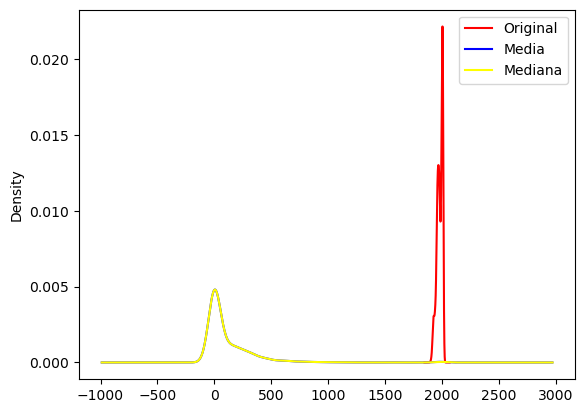

In [16]:
##Comparamos graficamente
fig=plt.figure()
ax =fig.add_subplot(111)
dataHP['GarageYrBlt'].plot.density(color='red',label='Original')
dataHP['GarageYrBlt_mean'].plot.density(color='blue',label='Media')
dataHP['GarageYrBlt_median'].plot.density(color='yellow',label='Mediana')


ax.legend()
plt.show()
##Imputar la media o mediana altera el comportamiento drasticamente. 

#### CCA (Complete case Analysis) 

In [17]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()) <= 0.06]
cols_rescatables
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 84), (1338, 78))

<AxesSubplot:>

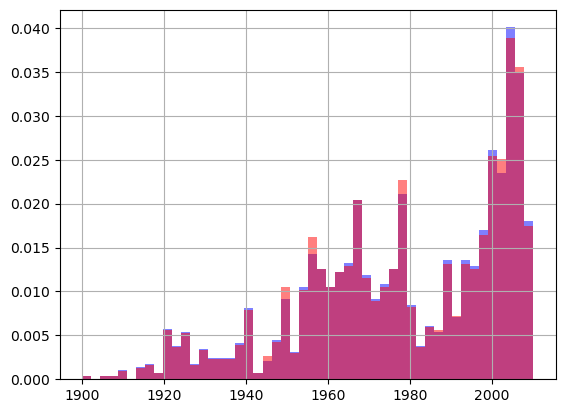

In [18]:
#Implicaciones del CCA
data_HP_noNAN['GarageYrBlt'].hist(bins=50,density=True,color='blue',alpha=0.5)
dataHP['GarageYrBlt'].hist(bins=50,density=True,color='red',alpha=0.5)




## Conclusión variables númericas 

1.  La variable MasVnrArea, al imputar la media el comportamiento de la densidad de los datos varia pero no es significativo. 
2. La variable GarageYrBlt al imputar la media o mediana, el cambio en el comportamiento de la densidad es significativo, por lo que se recomienda usar CCA para eliminar los NAN y reducir el impacto en el comportamiento de la varibale. 

## Variables categoricas 

In [19]:
### Debido a que las variables categoricas son muchas se usaran funciones para reducir el código generado. 
dataHP[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].dtypes


MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

### Vamos a usar el Missing category Imputation  

In [20]:
def getColumnTypes(dataset):
    '''
    Esta función extrae el tipo de dominio de las columnas de un dataset
    Entradas: 
        - dataset: Pandas Dataframe
    Salida: 
        - Tupla con arreglo que contiene nombres de las columnas
    '''
    continuas = []
    discretas = []
    categoricas = []
    for col in dataset.columns:
        if dataset[col].dtypes == 'int64' or dataset[col].dtype == 'float64':
            if len(dataset[col].unique()) > 30:
                continuas.append(col)
            else:
                # Verificar si la columna tiene valores NaN
                if dataset[col].isnull().sum() > 0:
                    # Calcular la media de los valores no nulos
                    media_nan = dataset[col][dataset[col].notnull()].mean()
                    # Verificar que el porcentaje de valores NaN sea menor que el 5%
                    porcentaje_nan = dataset[col].isnull().sum() / len(dataset)
                    if porcentaje_nan < 0.05:
                        discretas.append(col)
                        print(f"{col} es una variable discreta. Media de NaN: {media_nan}")
                    else:
                        categoricas.append(col)
                else:
                    discretas.append(col)
        else: 
            categoricas.append(col) 
    return continuas, discretas, categoricas


In [21]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [22]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(categoricas)
##Nota aquí no están clasificadas con el NAN menor del 5%

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [23]:
dataset_cat_missing = dataHP[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','SalePrice']]
dataset_cat_missing.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [24]:
dataset_cat_missing.isna().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

#### Clasificamos las que tengan un porcentaje de NAN menor al 5%

#### Verificamos las categorias con mayor impacto en cada variable. 

In [25]:
cat_cols_rescatables = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
nan_ratios = dataHP[cat_cols_rescatables].isna().mean()
col_nan_aceptable = nan_ratios[(nan_ratios < 0.05) & (nan_ratios > 0)]
col_nan_aceptable_df = pd.DataFrame({'Columna': col_nan_aceptable.index, 'Porcentaje de NaN': col_nan_aceptable.values})
print(col_nan_aceptable)


MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64


#### Vemos como están distribuidas las categorías dentro de cada variable. 

In [26]:
cat_cols_rescatables = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']                        
data_cat = dataHP[cat_cols_rescatables]
for col in cat_cols_rescatables:
       print(data_cat[col].value_counts(dropna=False)/len(cat_cols_rescatables))
       print("***************")

None       123.428571
BrkFace     63.571429
Stone       18.285714
BrkCmn       2.142857
NaN          1.142857
Name: MasVnrType, dtype: float64
***************
TA     92.714286
Gd     88.285714
Ex     17.285714
NaN     5.285714
Fa      5.000000
Name: BsmtQual, dtype: float64
***************
TA     187.285714
Gd       9.285714
Fa       6.428571
NaN      5.285714
Po       0.285714
Name: BsmtCond, dtype: float64
***************
No     136.142857
Av      31.571429
Gd      19.142857
Mn      16.285714
NaN      5.428571
Name: BsmtExposure, dtype: float64
***************
Unf    61.428571
GLQ    59.714286
ALQ    31.428571
BLQ    21.142857
Rec    19.000000
LwQ    10.571429
NaN     5.285714
Name: BsmtFinType1, dtype: float64
***************
Unf    179.428571
Rec      7.714286
LwQ      6.571429
NaN      5.428571
BLQ      4.714286
ALQ      2.714286
GLQ      2.000000
Name: BsmtFinType2, dtype: float64
***************
SBrkr    190.571429
FuseA     13.428571
FuseF      3.857143
FuseP      0.428571
Mix 

#### Vemos gráficamente en barras la distribución 

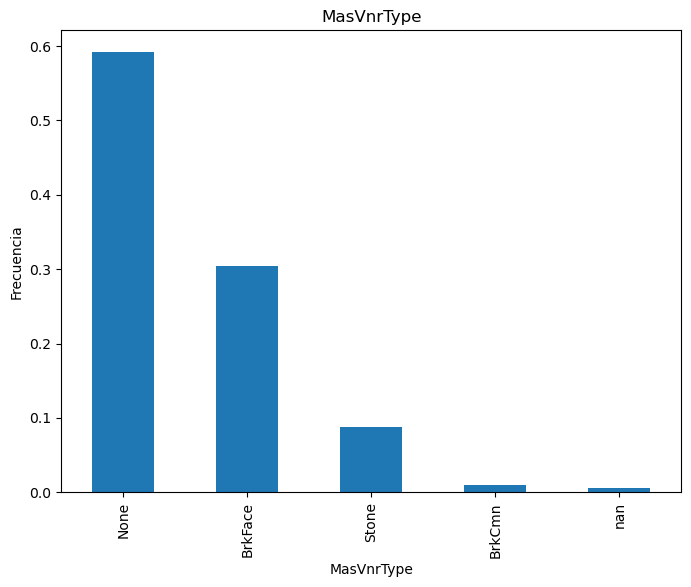

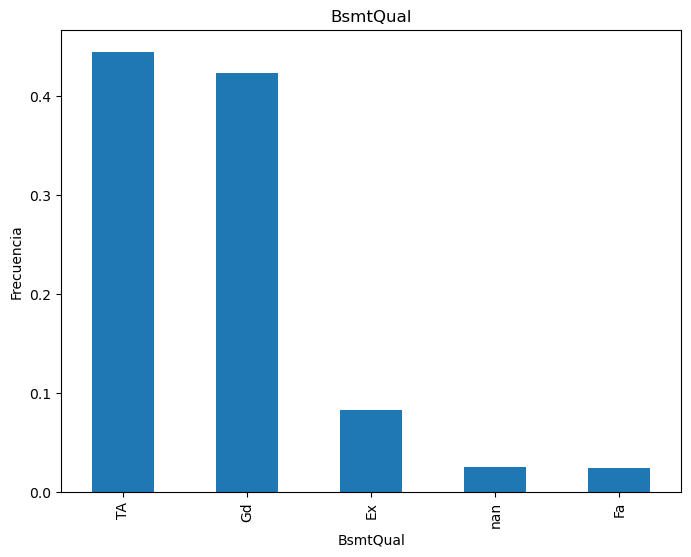

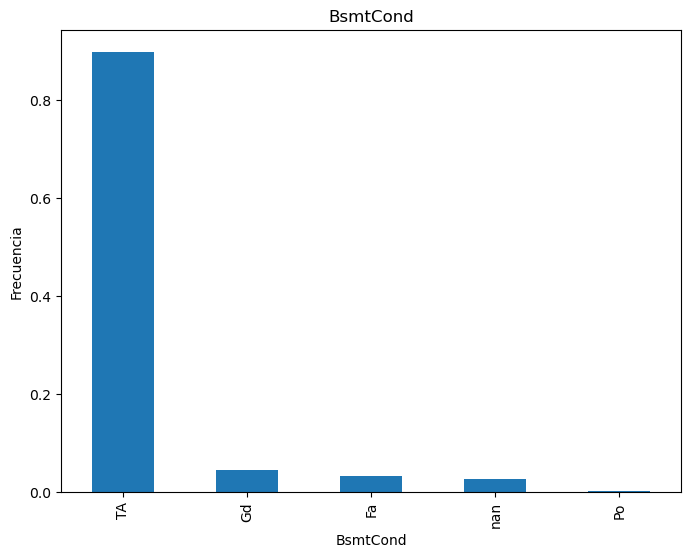

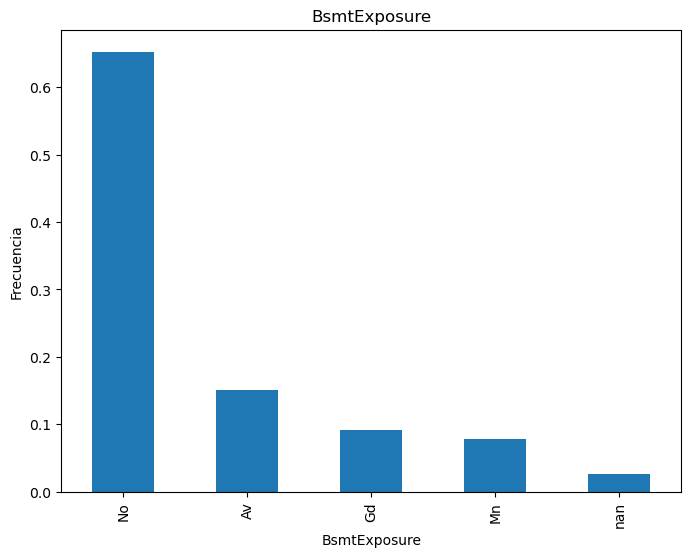

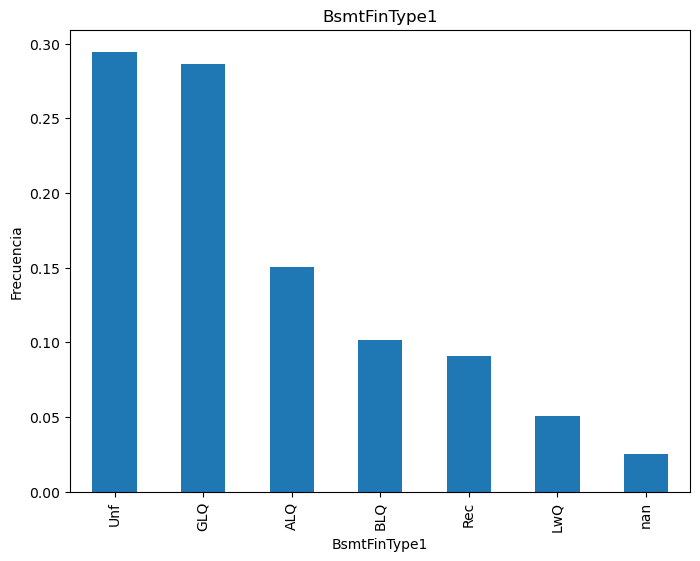

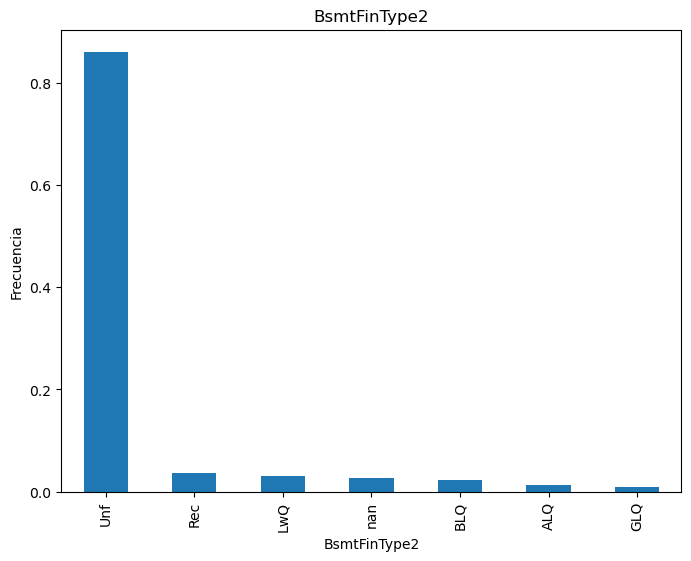

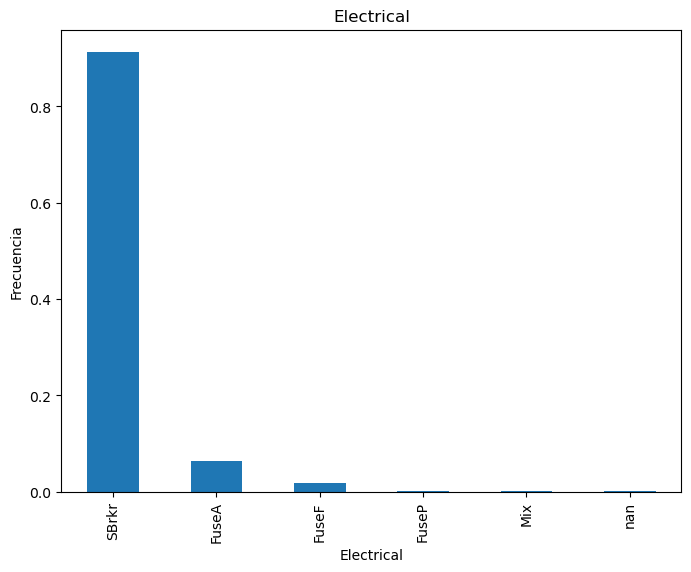

In [27]:
for col in cat_cols_rescatables:
    #Graficar barra
    plt.figure(figsize=(8, 6))
    data_cat[col].value_counts(dropna=False, normalize=True).plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Revisamos los Boxplot para ver su distribución 

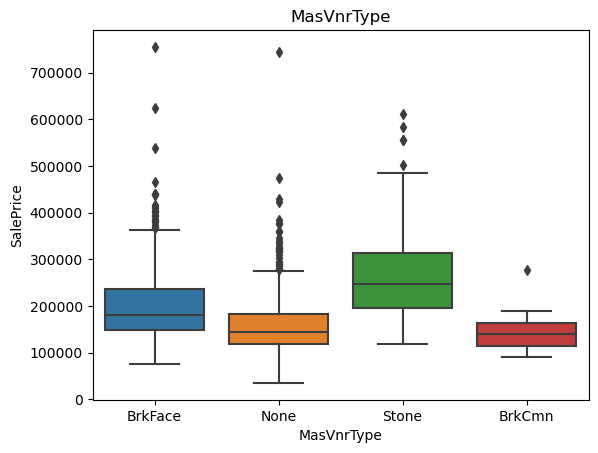

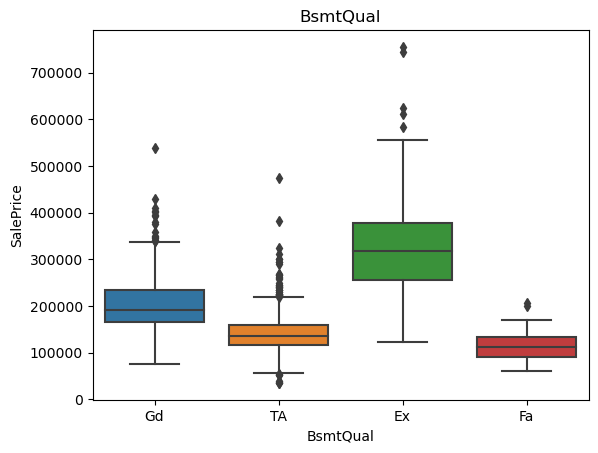

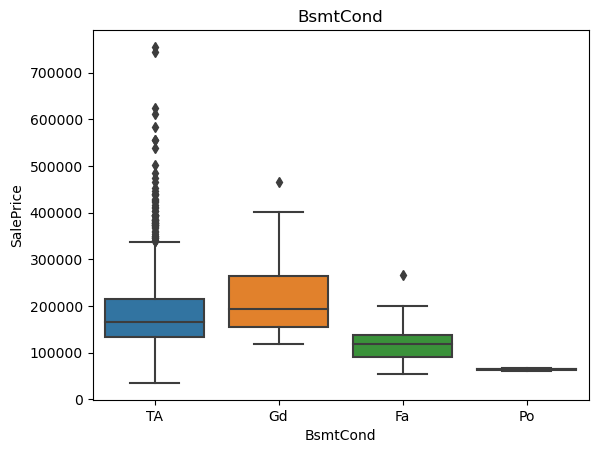

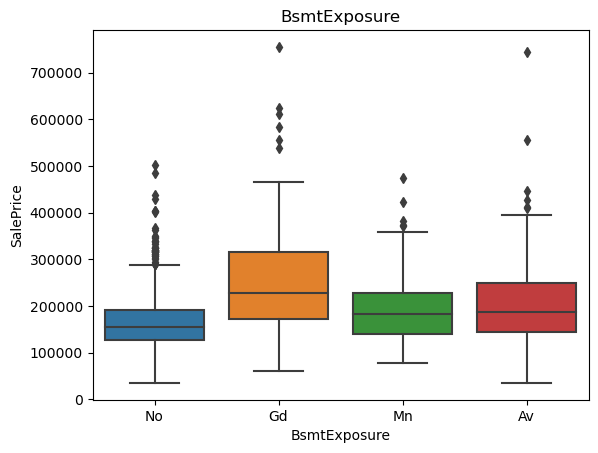

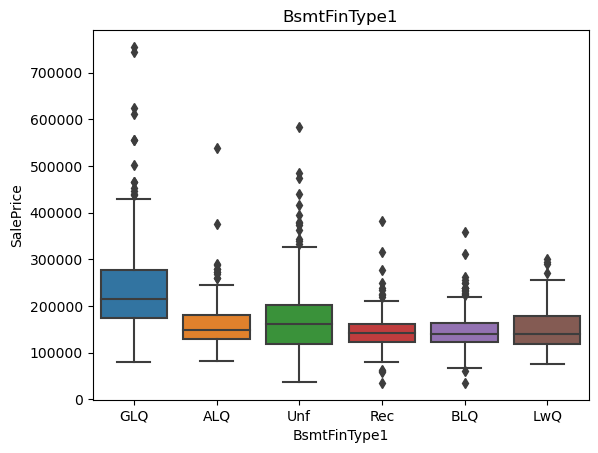

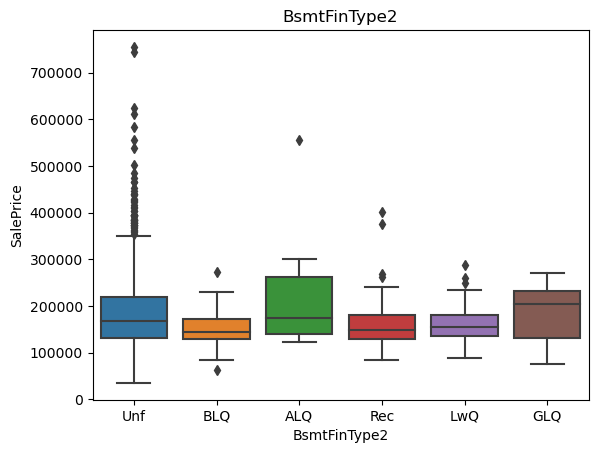

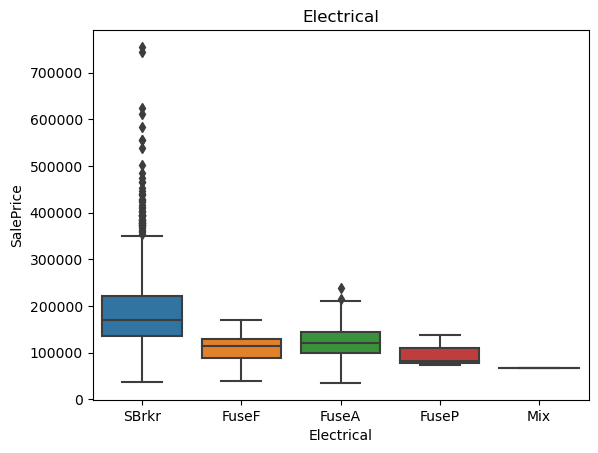

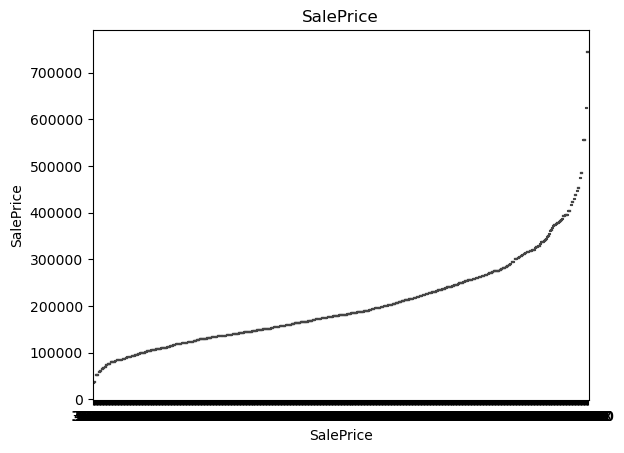

In [28]:
import seaborn as sns 

cat_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'SalePrice']
data_cat = dataHP[cat_cols]

def plot_boxplot(df, column):
    sns.boxplot(x=df[column], y=df['SalePrice'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

for col in cat_cols:
    plot_boxplot(data_cat, col)


### Vemos las gráficas de densidad agregando una categoría Missing para ver el comportamiento de las categorías como afectan el SalePrice.

In [29]:
import seaborn as sns

def plot_density(dataframe, column):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)

    colors = sns.color_palette('bright', n_colors=len(dataframe[column].unique()))

    for i, value in enumerate(dataframe[column].unique()):
        sns.kdeplot(dataframe[dataframe[column] == value]['SalePrice'], shade=True, ax=ax, label=value, color=colors[i])

    ax.set_xlabel('SalePrice')
    ax.set_ylabel('Densidad')
    ax.set_title(f'{column}')
    ax.legend()
    plt.show()


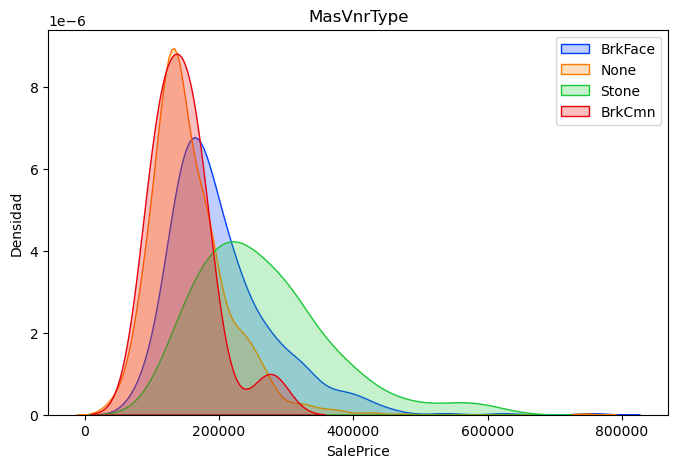

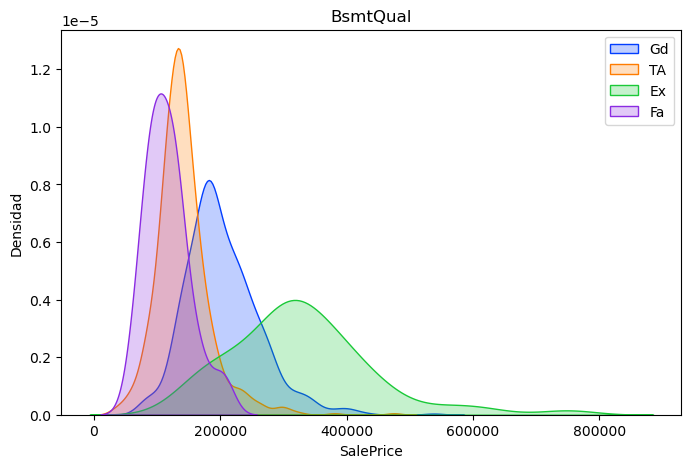

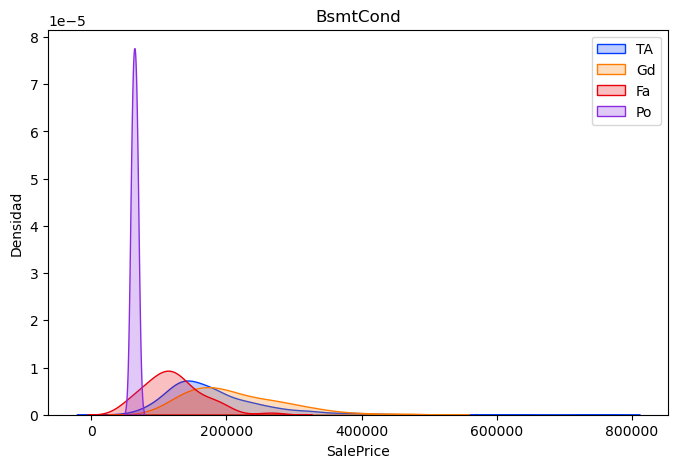

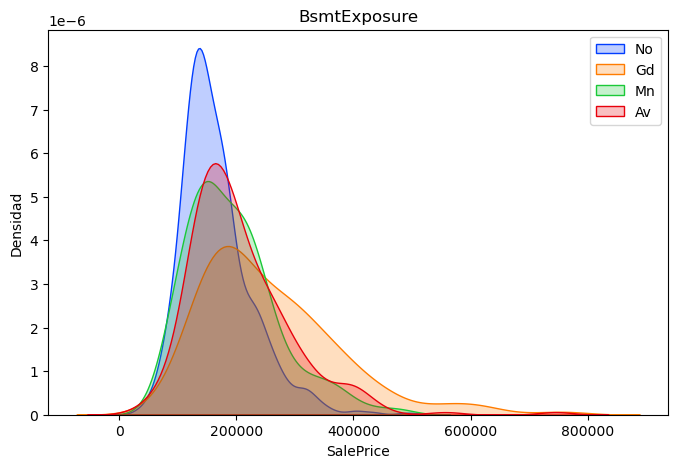

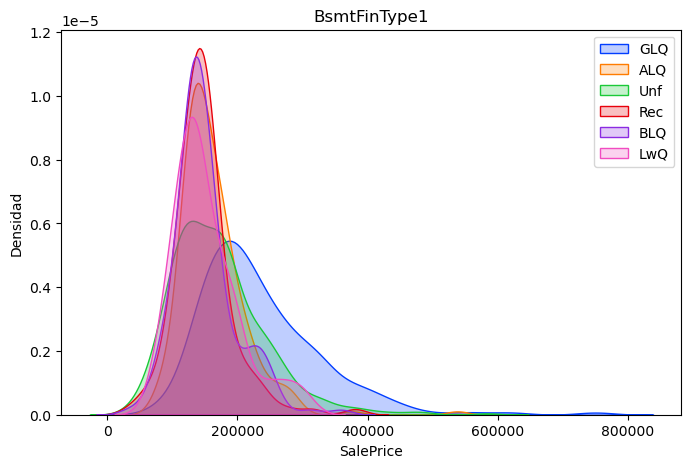

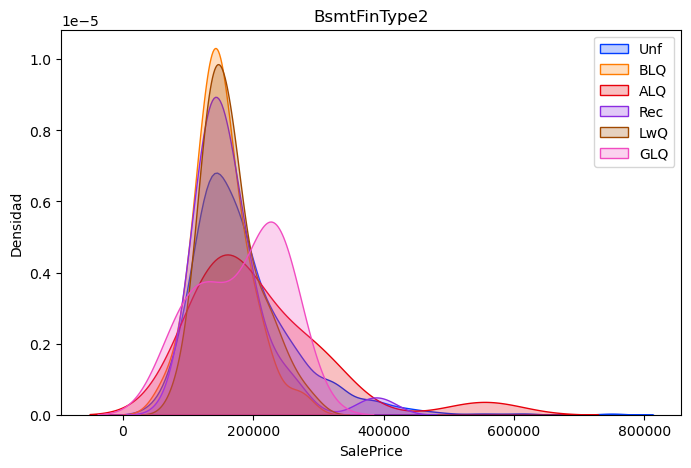

C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


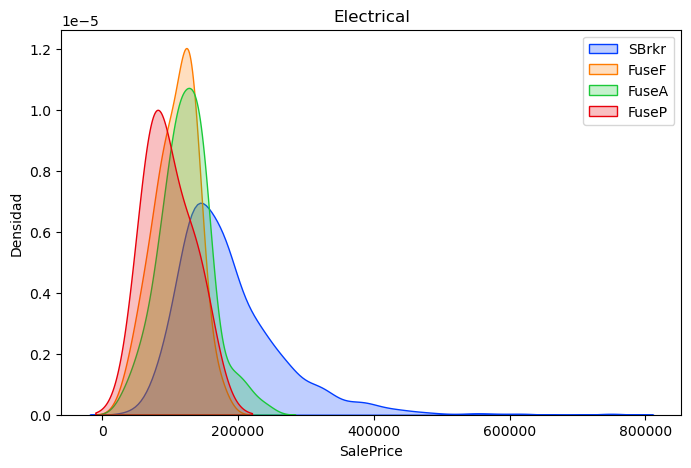

In [30]:
for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']:
    plot_density(dataHP, col)


### Imputación en función del dato que se acople mejor a los Missing. 

In [31]:
dataset_cat_missing['MasVnrType'].fillna('None',inplace=True) 
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True) 
dataset_cat_missing['BsmtExposure'].fillna('No',inplace=True) 
dataset_cat_missing['BsmtFinType1'].fillna('Unf',inplace=True) 
dataset_cat_missing['BsmtFinType2'].fillna('BLQ',inplace=True) 
dataset_cat_missing['Electrical'].fillna('BLQ',inplace=True) 
dataset_cat_missing['BsmtCond'].fillna('Po',inplace=True) 

C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\1163237842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['MasVnrType'].fillna('None',inplace=True)
C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\1163237842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)
C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\1163237842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

#### Codificación de variables categoricas

In [32]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames: 
        if(dataset[col].dtype=='object'): 
            cat_colnames.append(col) 
    return cat_colnames

In [33]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
cat_cols.append('SalePrice')

In [35]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [36]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [37]:
##Hacemos el encoding para todas las variables. 
object_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                  'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                  'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

pd.get_dummies(dataset_categories['MSZoning'])
pd.get_dummies(dataset_categories['Street'])
pd.get_dummies(dataset_categories['Alley'])
pd.get_dummies(dataset_categories['LotShape'])
pd.get_dummies(dataset_categories['LandContour'])
pd.get_dummies(dataset_categories['Utilities'])
pd.get_dummies(dataset_categories['LotConfig'])
pd.get_dummies(dataset_categories['LotConfig'])
pd.get_dummies(dataset_categories['LandSlope'])
pd.get_dummies(dataset_categories['Neighborhood'])
pd.get_dummies(dataset_categories['Condition1'])
pd.get_dummies(dataset_categories['Condition2'])
pd.get_dummies(dataset_categories['BldgType'])
pd.get_dummies(dataset_categories['Condition2'])
pd.get_dummies(dataset_categories['HouseStyle'])
pd.get_dummies(dataset_categories['RoofStyle'])
pd.get_dummies(dataset_categories['RoofMatl'])
pd.get_dummies(dataset_categories['Exterior2nd'])
pd.get_dummies(dataset_categories['MasVnrType'])
pd.get_dummies(dataset_categories['ExterQual'])
pd.get_dummies(dataset_categories['ExterCond'])
pd.get_dummies(dataset_categories['Foundation'])
pd.get_dummies(dataset_categories['BsmtQual'])
pd.get_dummies(dataset_categories['BsmtCond'])
pd.get_dummies(dataset_categories['BsmtExposure'])
pd.get_dummies(dataset_categories['BsmtFinType1'])
pd.get_dummies(dataset_categories['BsmtFinType2'])
pd.get_dummies(dataset_categories['Heating'])
pd.get_dummies(dataset_categories['HeatingQC'])
pd.get_dummies(dataset_categories['CentralAir'])
pd.get_dummies(dataset_categories['Electrical'])
pd.get_dummies(dataset_categories['KitchenQual'])
pd.get_dummies(dataset_categories['Functional'])
pd.get_dummies(dataset_categories['FireplaceQu'])
pd.get_dummies(dataset_categories['GarageType'])
pd.get_dummies(dataset_categories['GarageFinish'])
pd.get_dummies(dataset_categories['GarageQual'])
pd.get_dummies(dataset_categories['GarageCond'])
pd.get_dummies(dataset_categories['PavedDrive'])
pd.get_dummies(dataset_categories['PoolQC'])
pd.get_dummies(dataset_categories['Fence'])
pd.get_dummies(dataset_categories['MiscFeature'])
pd.get_dummies(dataset_categories['SaleType'])
pd.get_dummies(dataset_categories['SaleCondition'])







,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [38]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [39]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,210000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,266500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,142125,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Frequency Encoding 

In [45]:
##Vamos a utilizar solo las variables con un NAN menor al 5% las demás se descartan del dataset. 
cat_cols_rescatables = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
nan_ratios = dataHP[cat_cols_rescatables].isna().mean()
col_nan_aceptable = nan_ratios[(nan_ratios < 0.05) & (nan_ratios > 0)]
col_nan_aceptable_df = pd.DataFrame({'Columna': col_nan_aceptable.index, 'Porcentaje de NaN': col_nan_aceptable.values})
print(col_nan_aceptable)


MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64


In [49]:
#vemos como estan distribuidos los valores dentro de cada variable categorica. 
dataset_categories['MasVnrType'].value_counts().sort_values(ascending=False)
dataset_categories['BsmtQual'].value_counts().sort_values(ascending=False)
dataset_categories['BsmtCond'].value_counts().sort_values(ascending=False)
dataset_categories['BsmtExposure'].value_counts().sort_values(ascending=False)
dataset_categories['BsmtFinType1'].value_counts().sort_values(ascending=False)
dataset_categories['BsmtFinType2'].value_counts().sort_values(ascending=False)
dataset_categories['Electrical'].value_counts().sort_values(ascending=False)


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

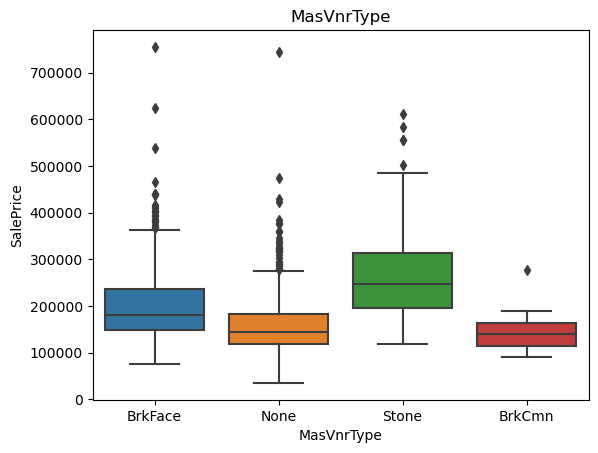

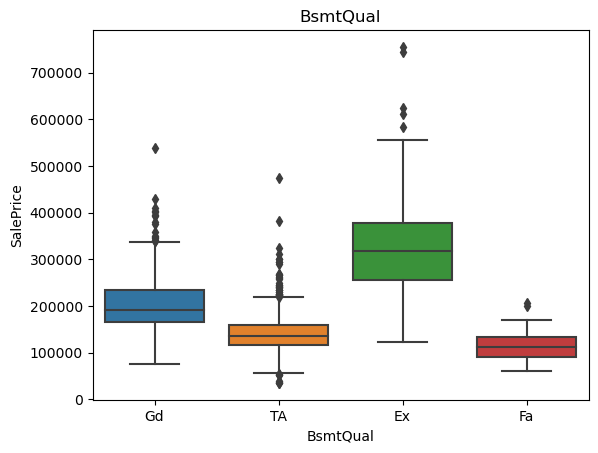

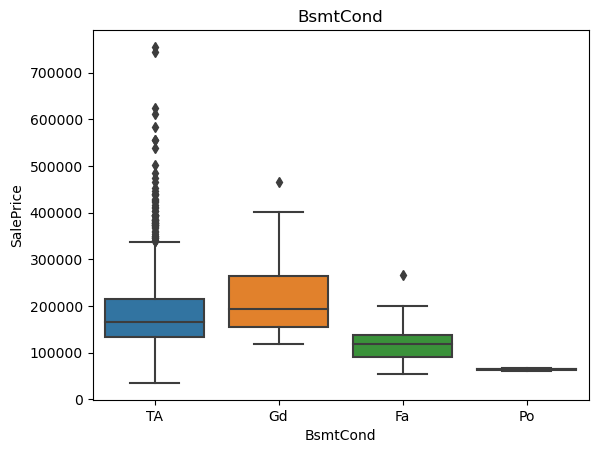

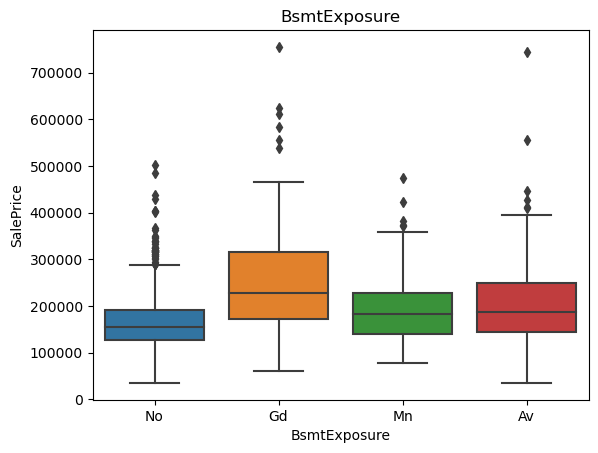

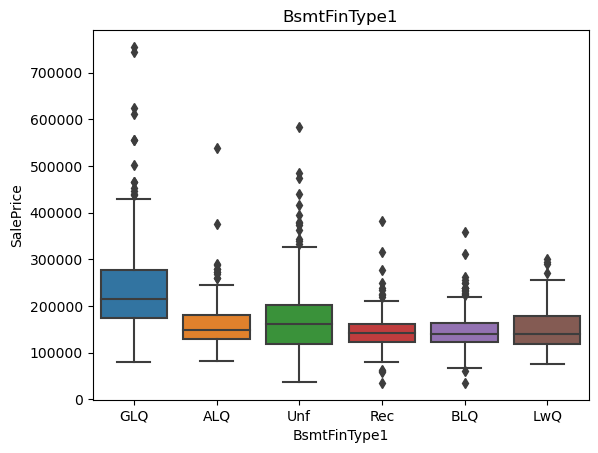

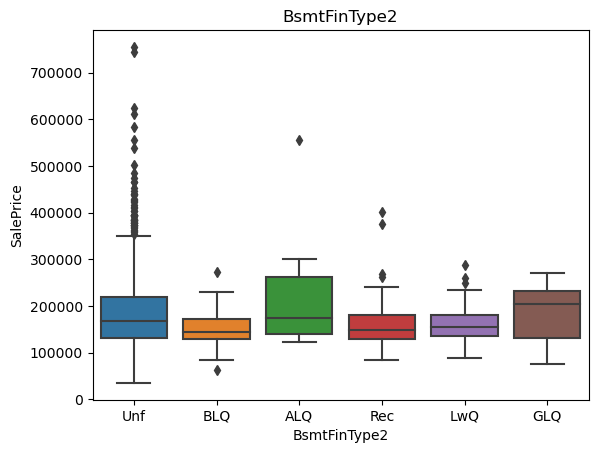

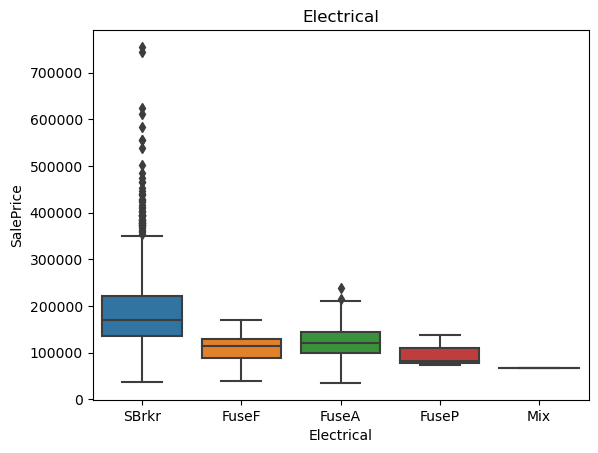

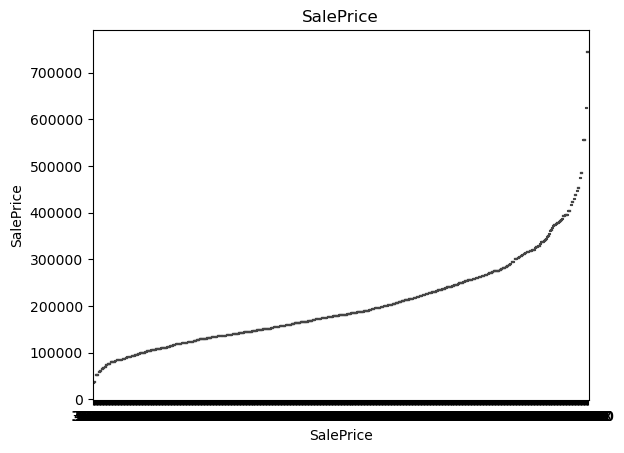

In [50]:
#Hacemos un Boxplot para ver su distribución estadistica. 
import seaborn as sns 

cat_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'SalePrice']
data_cat = dataHP[cat_cols]

def plot_boxplot(df, column):
    sns.boxplot(x=df[column], y=df['SalePrice'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.show()

for col in cat_cols:
    plot_boxplot(data_cat, col)

In [51]:
#Hacemos un diccionario para poder asignar a cada distribución un codigo. 
MasVnrTypeQual_freq_mapper = (dataset_categories['MasVnrType'].value_counts().sort_values(ascending=False))
BsmtQualQual_freq_mapper = (dataset_categories['BsmtQual'].value_counts().sort_values(ascending=False))
BsmtCondQual_freq_mapper = (dataset_categories['BsmtCond'].value_counts().sort_values(ascending=False))
BsmtExposureQual_freq_mapper = (dataset_categories['BsmtExposure'].value_counts().sort_values(ascending=False))
BsmtFinType1Qual_freq_mapper = (dataset_categories['BsmtFinType1'].value_counts().sort_values(ascending=False))
BsmtFinType2Qual_freq_mapper = (dataset_categories['BsmtFinType2'].value_counts().sort_values(ascending=False))
ElectricalQual_freq_mapper = (dataset_categories['Electrical'].value_counts().sort_values(ascending=False))



In [56]:
#Asignamos el código a cada distribución de las variables categoricas. 
dataset_categories['MasVnrType_code']=dataset_categories['MasVnrType'].map(MasVnrTypeQual_freq_mapper)
dataset_categories['BsmtQual_code']=dataset_categories['BsmtQual'].map(BsmtQualQual_freq_mapper)
dataset_categories['BsmtCond_code']=dataset_categories['BsmtCond'].map(BsmtCondQual_freq_mapper)
dataset_categories['BsmtExposure_code']=dataset_categories['BsmtExposure'].map(BsmtExposureQual_freq_mapper)
dataset_categories['BsmtFinType1_code']=dataset_categories['BsmtFinType1'].map(BsmtFinType1Qual_freq_mapper)
dataset_categories['BsmtFinType2_code']=dataset_categories['BsmtFinType2'].map(BsmtFinType2Qual_freq_mapper)
dataset_categories['Electrical_code']=dataset_categories['Electrical'].map(ElectricalQual_freq_mapper)

dataset_categories[['MasVnrType','MasVnrType_code']],dataset_categories[['BsmtQual','BsmtQual_code']],
dataset_categories[['BsmtCond','BsmtCond_code']],dataset_categories[['BsmtExposure','BsmtExposure_code']],
dataset_categories[['BsmtFinType1','BsmtFinType1_code']],dataset_categories[['BsmtFinType2','BsmtFinType2_code']],
dataset_categories[['Electrical','Electrical_code']]

# Imprimir los resultados para cada columna
print('MasVnrType:')
print(dataset_categories[['MasVnrType', 'MasVnrType_code']])

print('BsmtQual:')
print(dataset_categories[['BsmtQual', 'BsmtQual_code']])

print('BsmtCond:')
print(dataset_categories[['BsmtCond', 'BsmtCond_code']])

print('BsmtExposure:')
print(dataset_categories[['BsmtExposure', 'BsmtExposure_code']])

print('BsmtFinType1:')
print(dataset_categories[['BsmtFinType1', 'BsmtFinType1_code']])

print('BsmtFinType2:')
print(dataset_categories[['BsmtFinType2', 'BsmtFinType2_code']])

print('Electrical:')
print(dataset_categories[['Electrical', 'Electrical_code']])

MasVnrType:
     MasVnrType  MasVnrType_code
0       BrkFace            445.0
1          None            864.0
2       BrkFace            445.0
3          None            864.0
4       BrkFace            445.0
...         ...              ...
1455       None            864.0
1456      Stone            128.0
1457       None            864.0
1458       None            864.0
1459       None            864.0

[1460 rows x 2 columns]
BsmtQual:
     BsmtQual  BsmtQual_code
0          Gd          618.0
1          Gd          618.0
2          Gd          618.0
3          TA          649.0
4          Gd          618.0
...       ...            ...
1455       Gd          618.0
1456       Gd          618.0
1457       TA          649.0
1458       TA          649.0
1459       TA          649.0

[1460 rows x 2 columns]
BsmtCond:
     BsmtCond  BsmtCond_code
0          TA         1311.0
1          TA         1311.0
2          TA         1311.0
3          Gd           65.0
4          TA         1311.0


C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\102121396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['MasVnrType_code']=dataset_categories['MasVnrType'].map(MasVnrTypeQual_freq_mapper)
C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\102121396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtQual_code']=dataset_categories['BsmtQual'].map(BsmtQualQual_freq_mapper)
C:\Users\Franz Castillo\AppData\Local\Temp\ipykernel_22648\102121396.p

#### Conclusión Variable Categorica 

1. Se utilizaron dos metodos de encoding para las variables, uno se aplico para todas las variables categoricas y el segundo solo para las que tenían un Nan menor del 5%. 
2. El frequency encoding genera una gran cantidad de columnas nuevas, lo mejor es hacer rangos para evitar que el data set se convierta en algo dificil de interpretar. 
3. Adaptar los missing a una distribución que se comporte como una normal, es una buena estrategia pero siempre es importante conocer la naturaleza de los datos, ya que no en todos los casos se puede aplicar. 